In [2]:
%autosave 1

Autosaving every 1 seconds


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("creditcard.csv")

In [5]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
card,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
reports,0,0,0,0,0,0,0,0,0,0
age,37.66667,33.25,33.66667,30.5,32.16667,23.25,27.91667,29.16667,37.0,28.41667
income,4.52,2.42,4.5,2.54,9.7867,2.5,3.96,2.37,3.8,3.2
share,0.03327,0.005217,0.004156,0.065214,0.067051,0.044438,0.012576,0.076434,0.245628,0.01978
expenditure,124.9833,9.854167,15.0,137.8692,546.5033,91.99667,40.83333,150.79,777.8217,52.58
owner,yes,no,yes,no,yes,no,no,yes,yes,no
selfemp,no,no,no,no,no,no,no,no,no,no
dependents,3,3,4,0,2,0,2,0,0,0
months,54,34,58,25,64,54,7,77,97,65


In [6]:
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [7]:
print(data.shape)

(1319, 12)


In [8]:
data['card']=np.where(data['card'] =='yes', 1, data['card'])
data['card']=np.where(data['card'] =='no', 0, data['card'])
df1 = pd.to_numeric(data['card'])
data['card'] = df1
data.head(5).T

,0,1,2,3,4
card,1,1,1,1,1
reports,0,0,0,0,0
age,37.66667,33.25,33.66667,30.5,32.16667
income,4.52,2.42,4.5,2.54,9.7867
share,0.03327,0.005217,0.004156,0.065214,0.067051
expenditure,124.9833,9.854167,15.0,137.8692,546.5033
owner,yes,no,yes,no,yes
selfemp,no,no,no,no,no
dependents,3,3,4,0,2
months,54,34,58,25,64


In [9]:
data.dtypes

card             int64
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [10]:
data.groupby('card').mean()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
card,,,,,,,,,
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054
1,0.129032,33.216031,3.451273,0.088482,238.602421,0.969697,55.258065,0.839687,7.269795


Text(0, 0.5, 'Proportion of Approval')

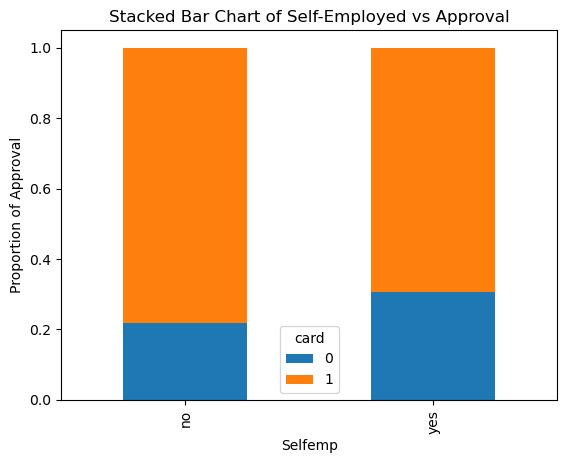

In [11]:
table= pd.crosstab(data.selfemp, data.card)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Self-Employed vs Approval')
plt.xlabel('Selfemp')
plt.ylabel('Proportion of Approval')

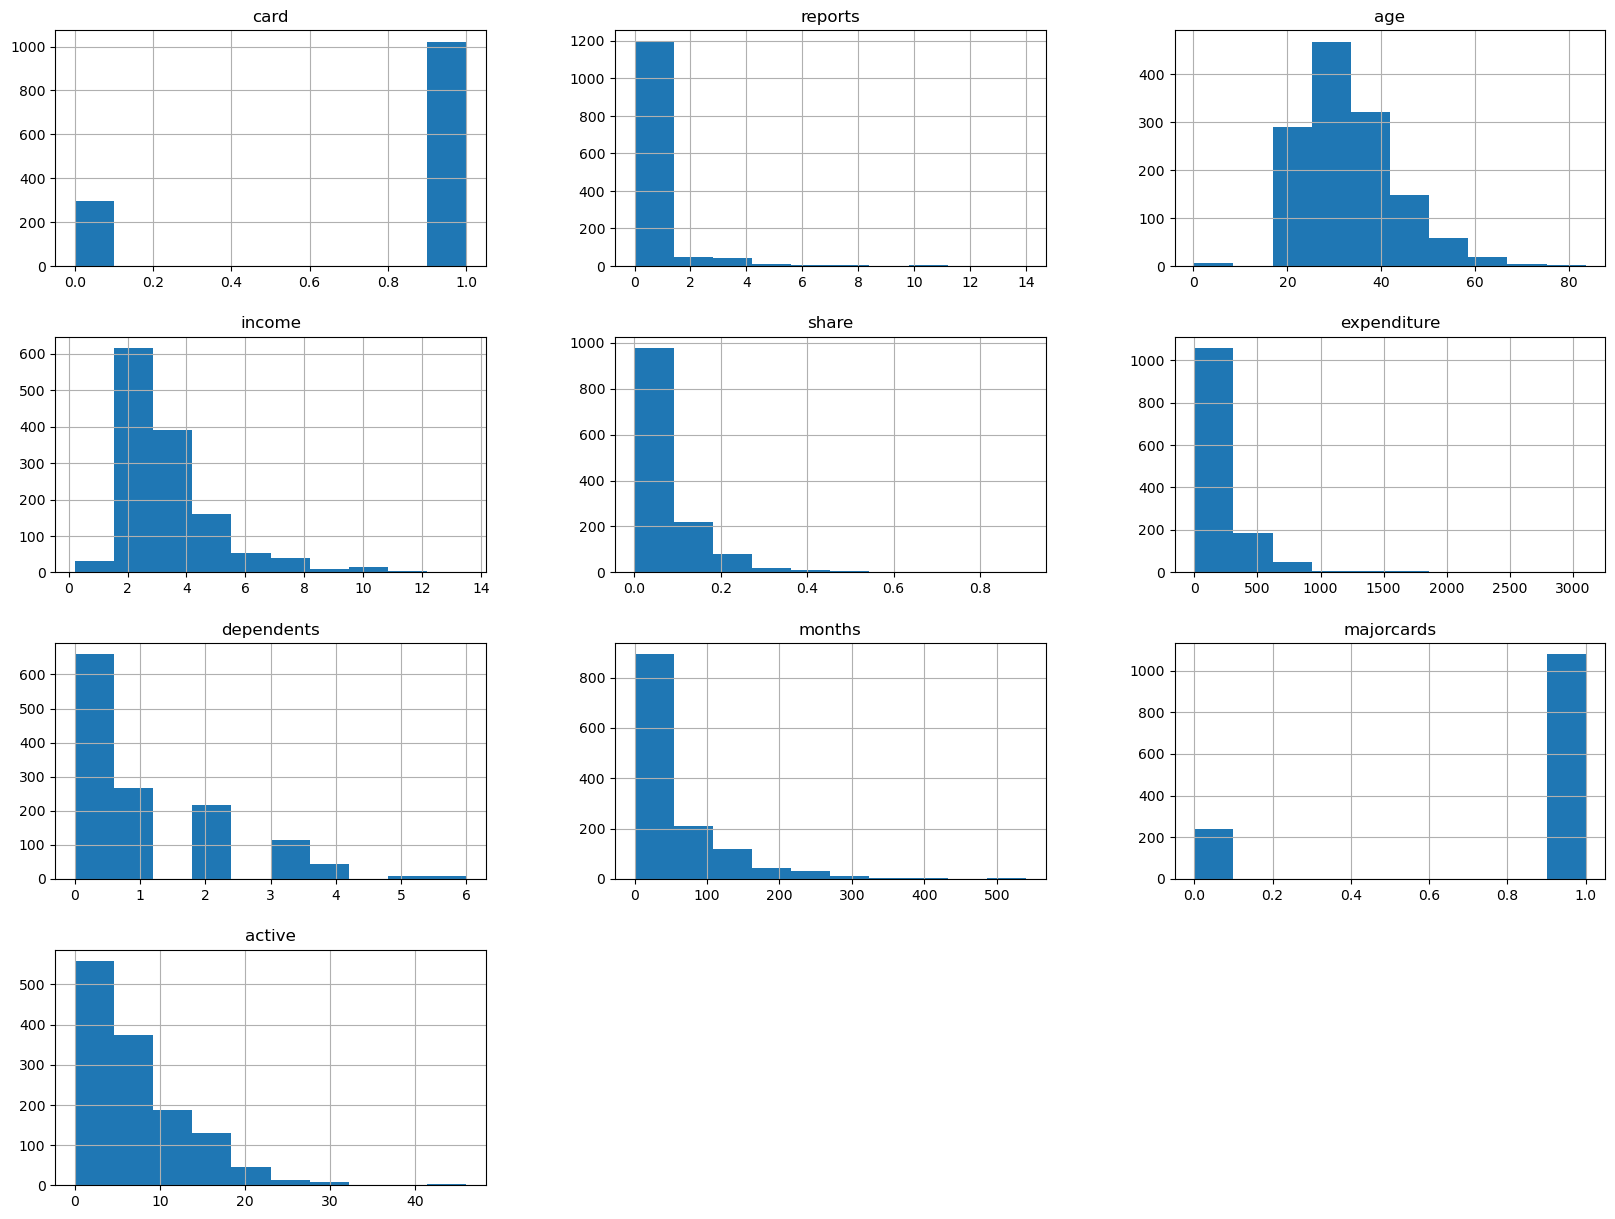

In [12]:
num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

In [13]:
num = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
cat = ['owner', 'selfemp']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
data_class = data.copy()

In [16]:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

df_train = df_train.drop('card', axis=1)
df_val = df_val.drop('card', axis=1)
df_test = df_test.drop('card', axis=1)


In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [18]:
for i in num:
    auc = roc_auc_score(y_train, df_train[i])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[i]) 
    print(f'feature: {i}------auc value: {auc}')

feature: reports------auc value: 0.7166629860689376
feature: age------auc value: 0.5240020979407055
feature: income------auc value: 0.5908049467233478
feature: share------auc value: 0.989183643423692
feature: expenditure------auc value: 0.991042345276873
feature: dependents------auc value: 0.5327757227773791
feature: months------auc value: 0.5294217780967629
feature: majorcards------auc value: 0.5343859842838476
feature: active------auc value: 0.6043173411362006


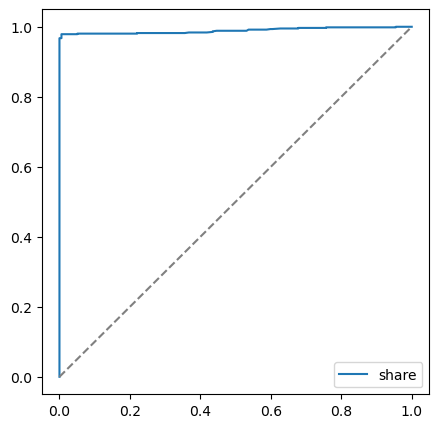

In [19]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.share)
plt.plot(fpr, tpr, label='share')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

# Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score and compute AUC with the card variable.
    Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

    reports
    dependents
    active
    share


Answer: share  

In [20]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [21]:
features = ["reports", "age", "income", "share", "expenditure",
            "dependents", "months", "majorcards", "active", "owner", "selfemp"
           ]

In [22]:
train_dict = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [23]:
np.round(roc_auc_score(y_val, y_pred),3)

0.995

In [24]:
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.9739783600107306

# Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.615
    0.515
    0.715
    0.995


Answer: 0.995

In [25]:
def confusion_matrix_dataframe(y_val, y_pred):

    scores = []
    
    thresholds = np.arange(0.0, 1.0, 0.01)


    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

df_scores = confusion_matrix_dataframe(y_val, y_pred)

df_scores[::10]


,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


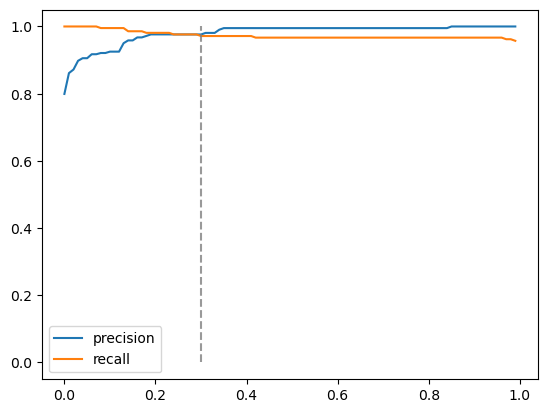

In [31]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.3, 0, 1, color='grey', linestyle='--', alpha=0.8)

plt.legend()
plt.show()



# Question 3

Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?

    0.1
    0.3
    0.6
    0.8


Answer: 0.3

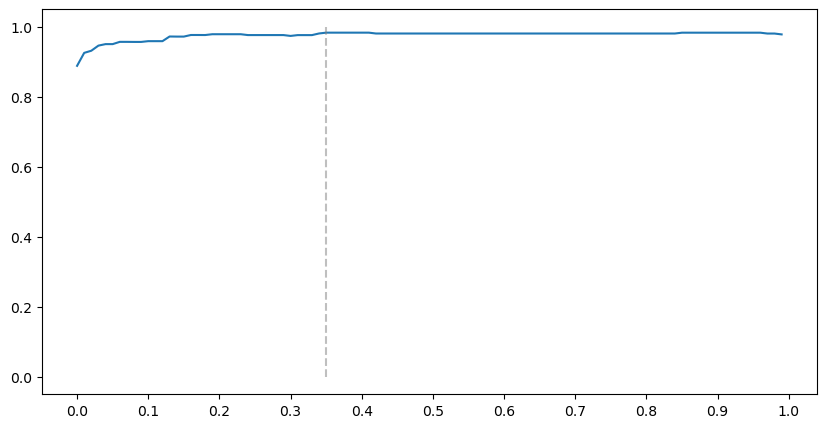

threshold      0.350000
tp           205.000000
fp             1.000000
fn             6.000000
tn            52.000000
p              0.995146
r              0.971564
f1             0.983213
Name: 35, dtype: float64

In [30]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.35, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

df_scores.iloc[df_scores.f1.argmax()]

# Question 4

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

    0.1
    0.4
    0.6
    0.7


Answer : 0.4

In [28]:
from sklearn.model_selection import KFold

def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))




0.996 +- 0.003


# Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

    0.003
    0.014
    0.09
    0.24


Answer: 0.003

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.992 +- 0.006
C= 0.1, 0.995 +- 0.004
C=   1, 0.996 +- 0.003
C=  10, 0.996 +- 0.003


# Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.01, 0.1, 1, 10]
    Initialize KFold with the same parameters as previously
    Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

    0.01
    0.1
    1
    10


Answer: 1